In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hotel_booking.csv")


In [3]:
print(data.head())
print(data.info())
print(data.describe())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [4]:
data = data.dropna()

In [5]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [6]:
# Feature Engineering
# Example: Creating a new feature 'total_stay' as sum of 'stays_in_weekend_nights' and 'stays_in_week_nights'
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

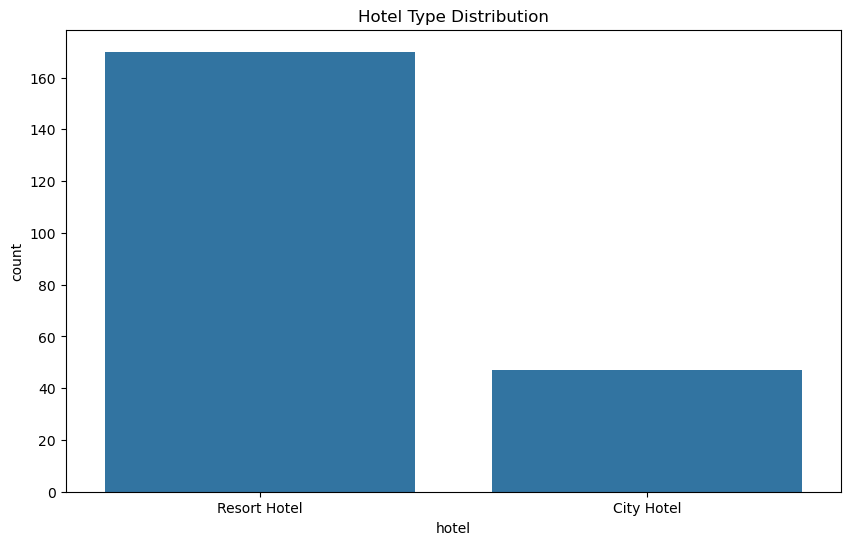

In [7]:
# Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='hotel', data=data)
plt.title('Hotel Type Distribution')
plt.show()

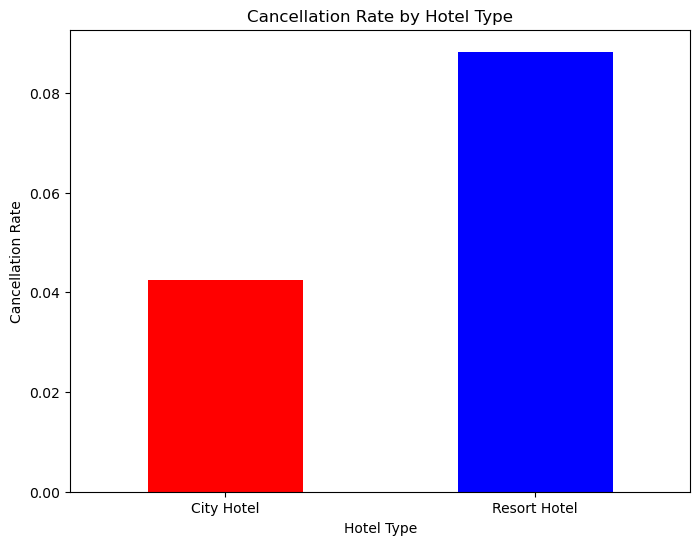

In [8]:
import matplotlib.pyplot as plt

# Calculate cancellation rate by hotel type
cancellation_rate_by_hotel = data.groupby('hotel')['is_canceled'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
cancellation_rate_by_hotel.plot(kind='bar', color=['red', 'blue'])
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.show()


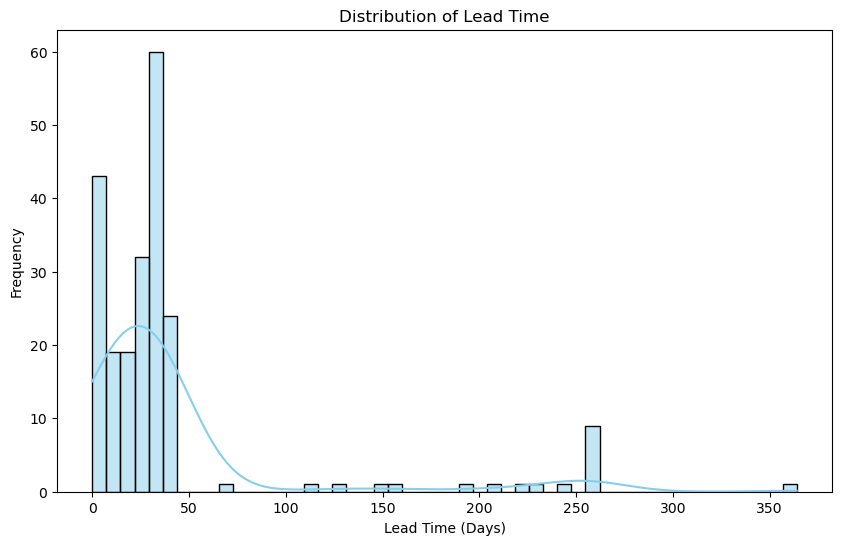

In [9]:
# Plotting lead time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

C:\Users\ax_va\AppData\Local\Temp\ipykernel_23776\687113574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market_segment', y='adr', data=data, palette='Set2')


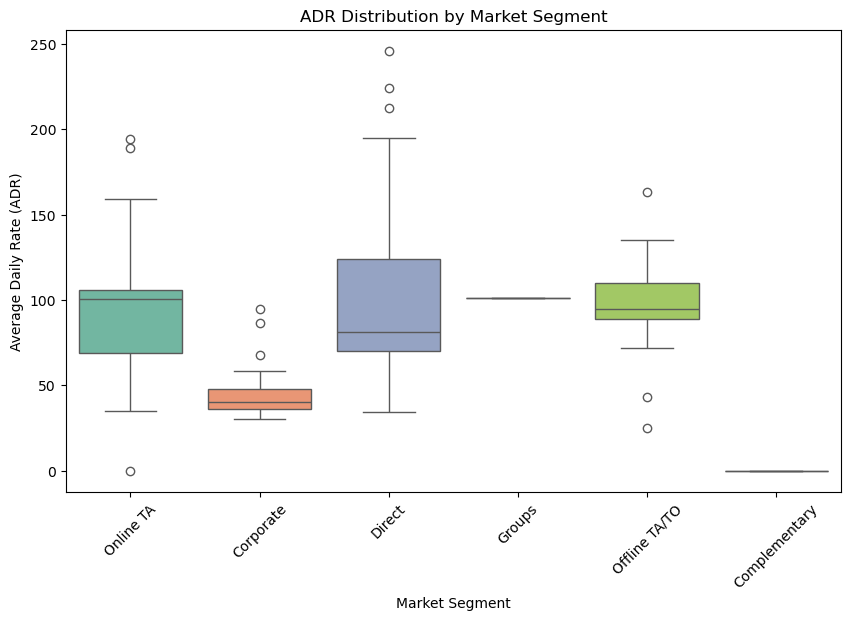

In [10]:
# Boxplot of ADR by Market Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment', y='adr', data=data, palette='Set2')
plt.title('ADR Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()


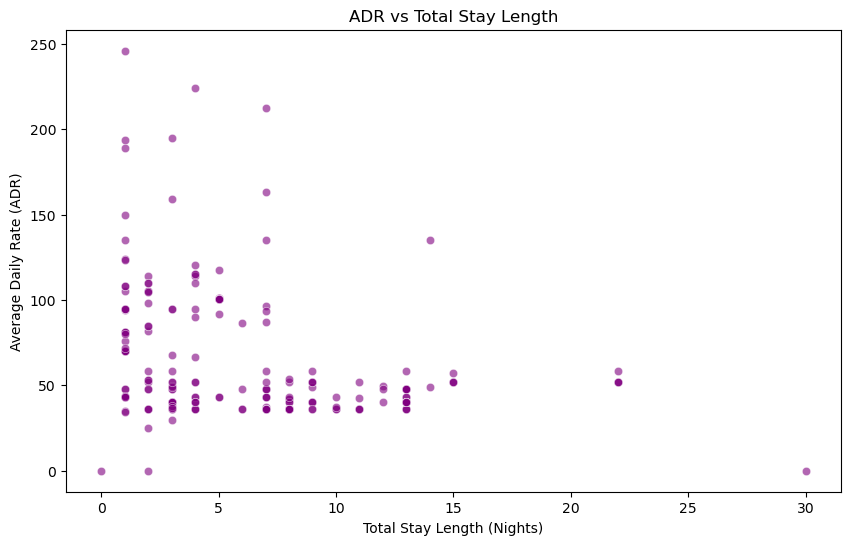

In [11]:
# Calculate total stay length
data['total_stay_length'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Scatter plot of ADR vs Stay Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_stay_length', y='adr', data=data, color='purple', alpha=0.6)
plt.title('ADR vs Total Stay Length')
plt.xlabel('Total Stay Length (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


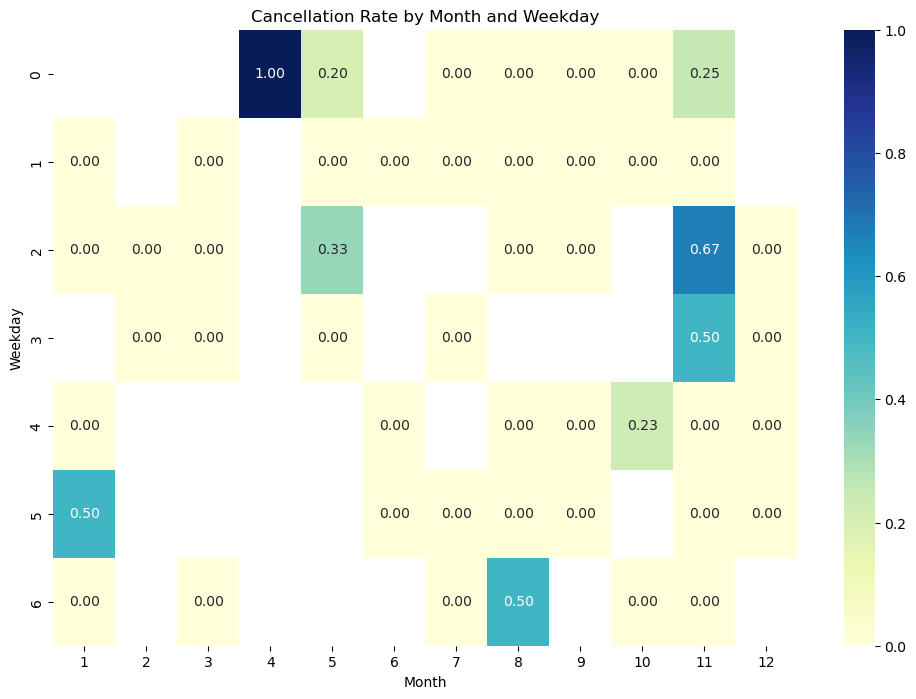

In [12]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract month and weekday from the reservation_status_date
data['month'] = data['reservation_status_date'].dt.month
data['weekday'] = data['reservation_status_date'].dt.weekday

# Pivot table for cancellations by month and weekday
heatmap_data = data.pivot_table(values='is_canceled', index='weekday', columns='month', aggfunc='mean')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cancellation Rate by Month and Weekday')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()
